In [ ]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

#loading the dataset
df = pd.read_csv("output.csv")

# 1. Descriptive Statistics:

## General Statistics

In [ ]:
df.describe()

,Unnamed: 0,temperature,completion_tokens,completion_time,prompt_time,queue_time
count,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000
mean,19.500000,0.50000,505.350000,1.381644,0.003489,0.327878
std,11.690452,0.50637,178.878637,0.980789,0.001300,0.479193
min,0.000000,0.00000,91.000000,0.157124,0.001870,0.067200
25%,9.750000,0.00000,406.500000,0.683178,0.002270,0.105096
50%,19.500000,0.50000,523.000000,0.936667,0.003261,0.200901
75%,29.250000,1.00000,623.250000,2.227273,0.004386,0.297776
max,39.000000,1.00000,799.000000,3.720000,0.006494,2.599980


## Model-based analysis:

In [ ]:
model_summary = df.groupby('model').agg({
    'completion_tokens': ['mean', 'std', 'sum'],
    'completion_time': ['mean', 'std'],
    'prompt_time': ['mean', 'std'],
    'queue_time': ['mean', 'std']
}).reset_index()

model_summary

model completion_tokens                    \
                                        mean         std   sum   
0             gemma2-9b-it           467.750   90.351299  3742   
1     llama-3.1-8b-instant           610.125  130.131184  4881   
2  llama-3.3-70b-versatile           643.000   82.783711  5144   
3       mixtral-8x7b-32768           330.875  126.704874  2647   
4             qwen-2.5-32b           475.000  242.091482  3800   

  completion_time           prompt_time           queue_time            
             mean       std        mean       std       mean       std  
0        0.867714  0.171428    0.002096  0.000121   0.099512  0.010642  
1        0.813500  0.173508    0.003039  0.000422   0.962904  0.815850  
2        2.338182  0.301032    0.005422  0.000631   0.288170  0.080536  
3        0.513822  0.198104    0.002623  0.000714   0.086779  0.018108  
4        2.375000  1.210457    0.004264  0.000220   0.202023  0.000580

In [ ]:
# Average completion tokens by temperature
temp_completion_tokens = df.groupby('temperature')['completion_tokens'].mean()

# Average completion time by temperature
temp_completion_time = df.groupby('temperature')['completion_time'].mean()


# 2. Content Length Analysis:

In [ ]:

# Calculating the length of generated content
df['content_length'] = df['content'].apply(len)

# Average content length by model
model_content_length = df.groupby('model')['content_length'].mean()


# 3. Sentiment Analysis on Generated Content:

In [ ]:
def get_sentiment(content):
    # Using TextBlob for sentiment analysis
    analysis = TextBlob(content)
    # Polarity: -1 (negative) to 1 (positive)
    return analysis.sentiment.polarity

df['content_sentiment'] = df['content'].apply(get_sentiment)

# Sentiment distribution
sentiment_counts = df['content_sentiment'].value_counts()


# 4. Visualizations:


## 4.1 Completion Tokens Distribution by Model

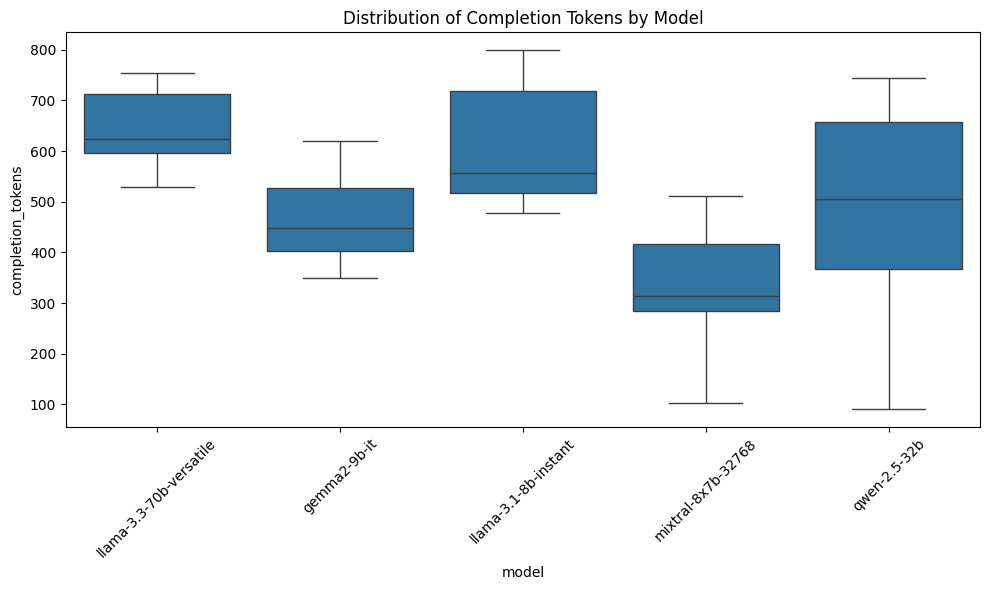

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='model', y='completion_tokens', data=df)
plt.title("Distribution of Completion Tokens by Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4.2 Average Completion Time by Model

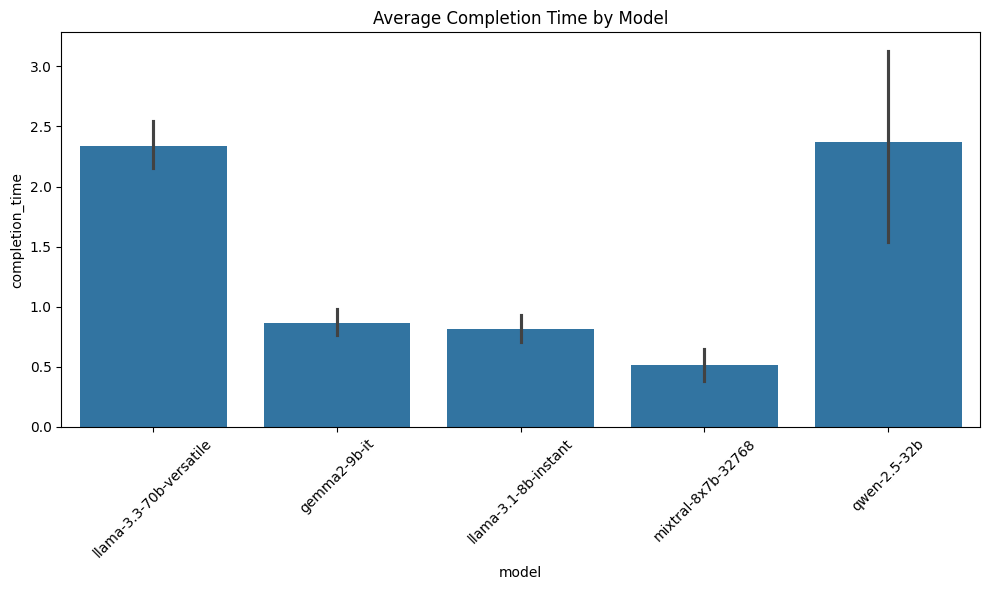

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='completion_time', data=df)
plt.title("Average Completion Time by Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4.3 Content Length by Model

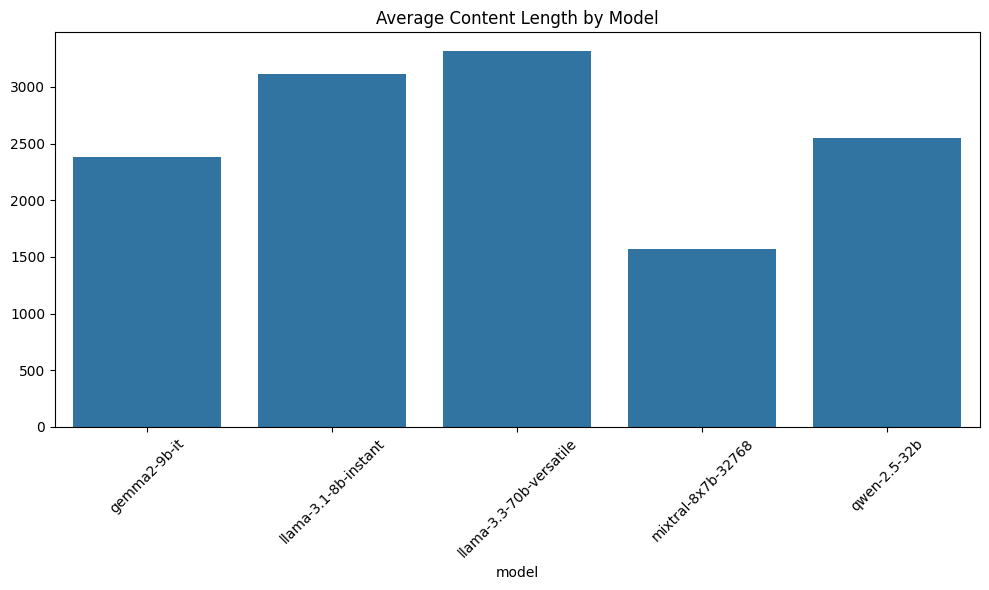

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_content_length.index, y=model_content_length.values)
plt.title("Average Content Length by Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.4 Wordcloud of Content (Only for a few samples or the entire dataset)

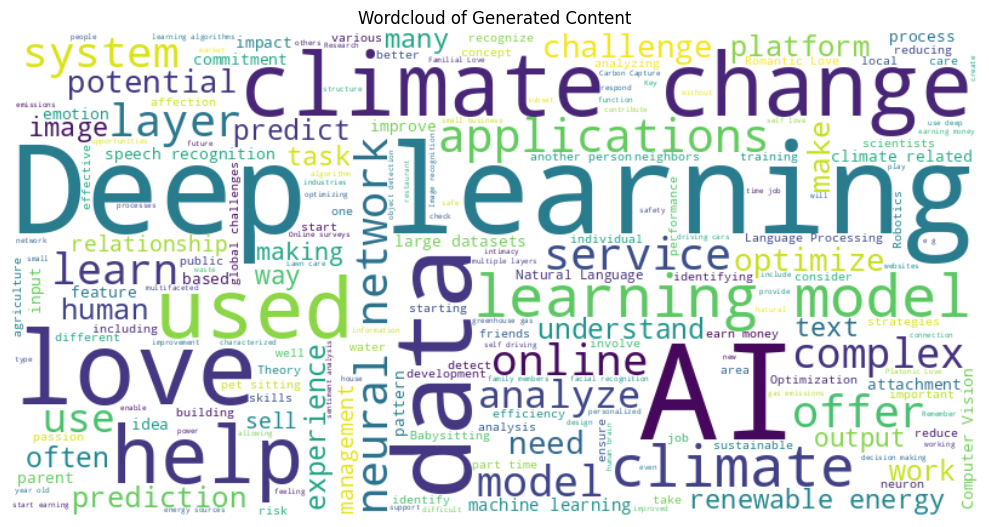

In [ ]:
text = " ".join(df['content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud of Generated Content")
plt.tight_layout()
plt.show()


## 4.5 Sentiment Distribution of Generated Content

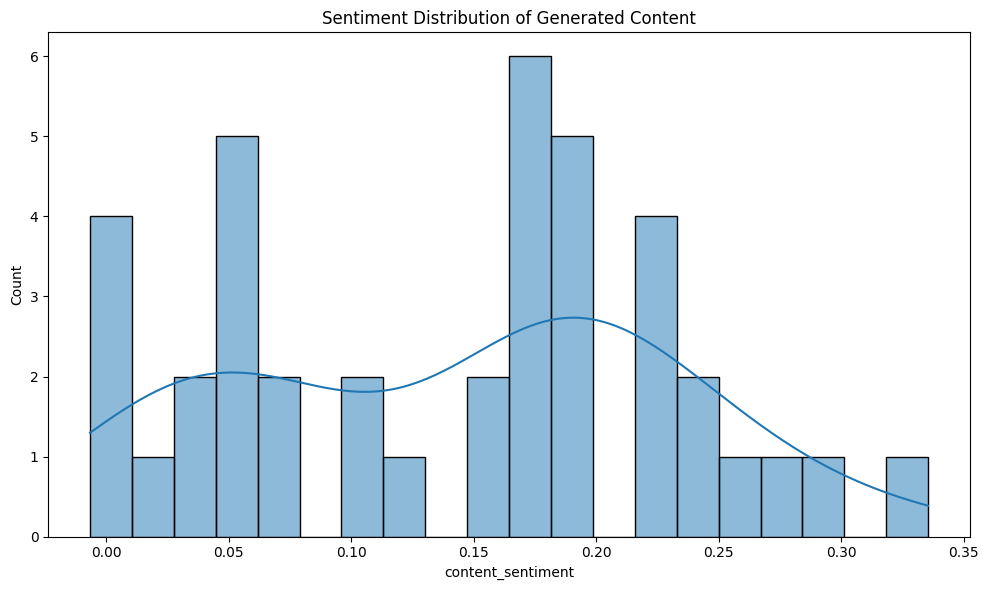

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['content_sentiment'], bins=20, kde=True)
plt.title("Sentiment Distribution of Generated Content")
plt.tight_layout()
plt.show()


## 4.6 Temperature vs. Completion Tokens

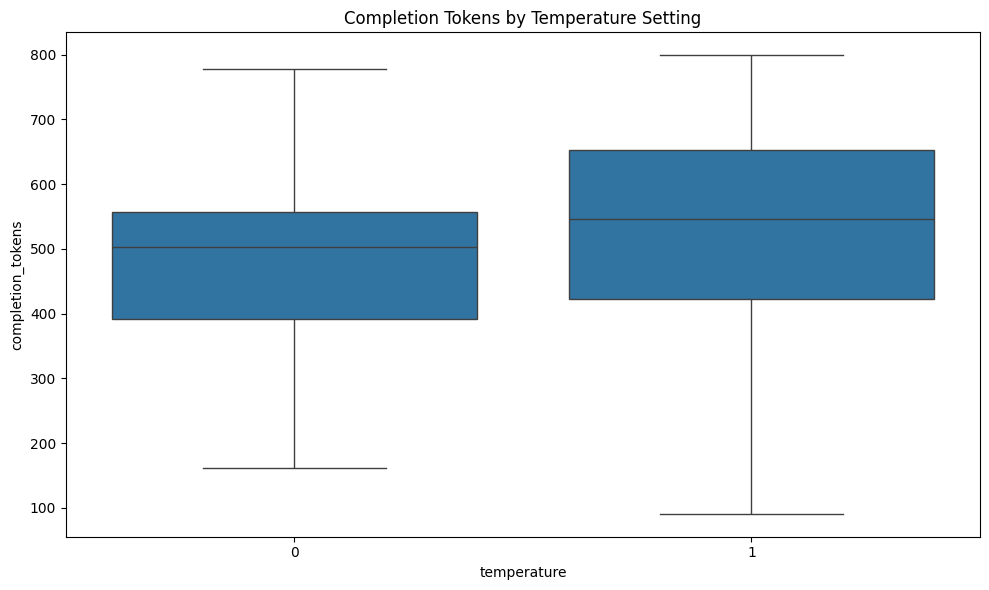

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='temperature', y='completion_tokens', data=df)
plt.title("Completion Tokens by Temperature Setting")
plt.tight_layout()
plt.show()

## 4.7 Temperature vs. Completion Time

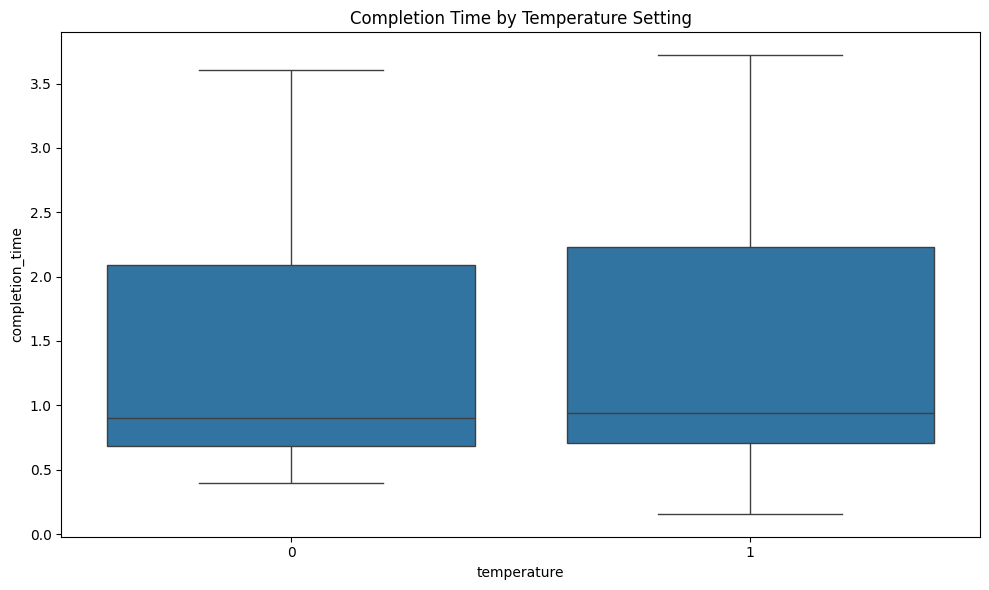

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='temperature', y='completion_time', data=df)
plt.title("Completion Time by Temperature Setting")
plt.tight_layout()
plt.show()